Loop:	99.6 ms ± 966 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


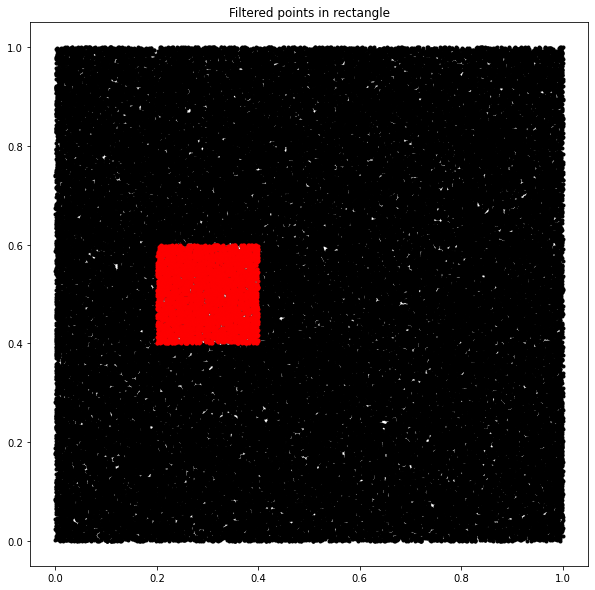

In [1]:
import numpy as np


def random_array(size, dim=3):
    """
    Generate a random array of size size and dimension dim
    """
    return np.random.rand(int(size), dim)


def loop(array):
    """
    Takes a numpy array and isolates all points that are within [0.2,0.4]
    for the first column and between [0.4,0.6] for the second column by
    looping through every point.
    """
    filtered_list = []
    for i in range(len(array)):
        # Check if the point is within the rectangle
        if ((array[i][0] >= 0.2)
            and (array[i][1] >= 0.4)
            and (array[i][0] <= 0.4)
            and (array[i][1] <= 0.6)):
            filtered_list.append(array[i])
    return np.array(filtered_list)


# Generate a random array of size 1e5
array = random_array(1e5)
filtered_array = loop(array)

# Measure code execution with inline magic (Jupyter Notebook)
print('Loop:\t', end='')
%timeit loop(array)

# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.title('Filtered points in rectangle')
plt.plot(array[:, 0], array[:, 1], 'k.')
plt.plot(filtered_array[:, 0], filtered_array[:, 1], 'r.')
plt.show()

https://towardsdatascience.com/speeding-up-python-code-fast-filtering-and-slow-loops-8e11a09a9c2f

modification de l'itération et du référencement des items. -30ms

Loop:	64.1 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


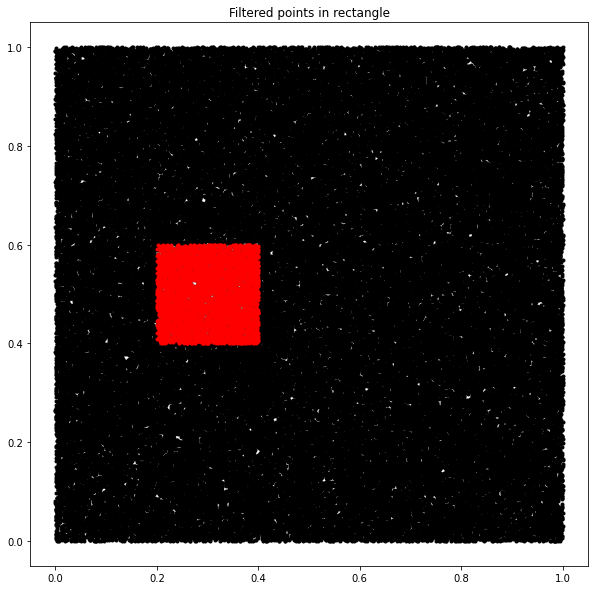

In [2]:
def random_array(size, dim=3):
    """
    Generate a random array of size size and dimension dim
    """
    return np.random.rand(int(size), dim)


def loop(array):
    """
    Takes a numpy array and isolates all points that are within [0.2,0.4]
    for the first column and between [0.4,0.6] for the second column by
    looping through every point.
    """
    filtered_list = []
    for item in array:
        # Check if the point is within the rectangle
        if ((item[0] >= 0.2)
            and (item[1] >= 0.4)
            and (item[0] <= 0.4)
            and (item[1] <= 0.6)):
            filtered_list.append(item)
    return np.array(filtered_list)


# Generate a random array of size 1e5
array = random_array(1e5)
filtered_array = loop(array)

# Measure code execution with inline magic (Jupyter Notebook)
print('Loop:\t', end='')
%timeit loop(array)

# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.title('Filtered points in rectangle')
plt.plot(array[:, 0], array[:, 1], 'k.')
plt.plot(filtered_array[:, 0], filtered_array[:, 1], 'r.')
plt.show()

Without numpy -40 ms 

In [3]:
def python_loop(random_list):
    """
    Takes a list of tuples and isolates all points that are within [0.2,0.4]
    for the first dimension and between [0.4,0.6] for the second dimension.
    """
    filtered_list = []
    for item in random_list:
        if ((item[0] >= 0.2)
            and (item[1] >= 0.4)
            and (item[0] <= 0.4)
            and (item[1] <= 0.6)):
            filtered_list.append(item)
    return filtered_list

# Convert the numpy array to a list of tuples
python_list = list(map(tuple, array))

print('Python loop:\t', end='')
%timeit python_loop(python_list)

Python loop:	20.3 ms ± 464 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
# List comprehension

def list_comprehension(tuple_list):
    """
    Takes a list of tuples and isolates all points that are within [0.2,0.4]
    for the first dimension and between [0.4,0.6] for the second dimension
    using a list comprehension.
    """
    filtered_list = [_ for _ in tuple_list if (_[0] >= 0.2) and (_[1] >= 0.4) and (_[0] <= 0.4) and (_[1] <= 0.6)]
    return filtered_list

print('List comprehension:\t', end='')
%timeit list_comprehension(python_list)


# Filter method

def filter_fctn(_):
    """
    Takes a tuple and returns True if the first value is within [0.2,0.4]
    while the second value is between [0.4,0.6].
    """
    return (_[0] >= 0.2) and (_[1] >= 0.4) and (_[0] <= 0.4) and (_[1] <= 0.6)

print('Filter:\t\t\t', end='')
%timeit list(filter(filter_fctn, python_list))


def map_fctn(_):
    """
    Takes a tuple and returns it if the first value is within [0.2,0.4]
    while the second value is between [0.4,0.6].
    """
    if (_[0] >= 0.2) and (_[1] >= 0.4) and (_[0] <= 0.4) and (_[1] <= 0.6):
        return _

print('Map:\t\t\t', end='')
%timeit list(filter(map_fctn, python_list))

List comprehension:	20.8 ms ± 414 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Filter:			24.5 ms ± 612 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Map:			24.4 ms ± 552 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


boolean index 

In [5]:
def boolean_index(array):
    """
    Takes a numpy array and isolates all points that are within [0.2,0.4] for
    the first dimension and between [0.4,0.6] for
    the second dimension by creating a boolean index.
    """
    index = (array[:, 0] >= 0.2) & (array[:, 1] >= 0.4) & (array[:, 0] <= 0.4) & (array[:, 1] <= 0.6)

    return array[index]

print('Boolean index:\t', end='')
%timeit boolean_index(array)

Boolean index:	551 µs ± 8.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
from numba.typed import List
from numba import njit

@njit
def boolean_index_numba(array):
    """
    Takes a numpy array and isolates all points that are within [0.2,0.4] for
    the first dimension and between [0.4,0.6] for the second dimension
    by creating a boolean index. 
    This function will be compiled with numba.
    """
    index = (array[:, 0] >= 0.2) & (array[:,  1] >= 0.4) & (array[:, 0] <= 0.4) & (array[:, 1] <= 0.6)

    return array[index]


@njit
def loop_numba(array):
    """
    Takes a numpy array and isolates all points that are within [0.2,0.4] for
    the first dimension and between [0.4,0.6] for the second dimension.
    This function will be compiled with numba.
    """
    filtered_list = List()
    for i in range(len(array)):
        if ((array[i][0] >= 0.2)
            and (array[i][1] >= 0.4)
            and (array[i][0] <= 0.4)
            and (array[i][1] <= 0.6)):
            filtered_list.append(array[i])
    return filtered_list


filtered_list = boolean_index_numba(array)
print('Boolean index with numba:\t', end='')
%timeit boolean_index_numba(array)

filtered_list = loop_numba(array)
print('Loop with numba:\t\t', end='')
%timeit loop_numba(array)

/home/beretta/.local/lib/python3.7/site-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


Boolean index with numba:	297 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Loop with numba:		771 µs ± 8.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


KD Tree

In [8]:
from scipy.spatial import cKDTree

def kdtree(data, delta=0.1):
    """
    Constructs a 2D k-d-tree from the input array and queries the points within a square around a given point.
    """
    array, query_points = data
    tree = cKDTree(array)
    count = 0
    for point in query_points:
        idx = tree.query_ball_point((point[0], point[1], point[2]), 0.1, p=np.float('inf'))
        filtered = array[idx]
        count += len(filtered)

    return count

array, query_points = data
tree = cKDTree(array)

# Time the construction of the tree
print('Tree construction:\t', end='')
%timeit cKDTree(array)

# Time the querying time
point = query_points[0]
print('Query time:\t\t', end='')
%timeit tree.query_ball_point((point[0], point[1], point[2]), 0.1, p=np.float('inf'))

# Time the total time for the whole array
print('Total time:\t\t', end='')
%timeit kdtree(data)

print('Count for k-d-tree: {:,}'.format(kdtree(data)))

NameError: name 'data' is not defined